In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("Resources/city_data.csv")
ride_data_to_load = pd.read_csv("Resources/ride_data.csv")

# Read the City and Ride Data
combined_data = pd.merge(ride_data_to_load,city_data_to_load, on = "city", how = "left")
# Combine the data into a single dataset

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

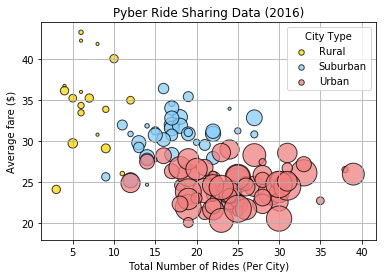

<Figure size 432x288 with 0 Axes>

In [2]:
# Obtain the x and y coordinates for each of the three city types
x_axis = combined_data.groupby(["city"])["ride_id"].count()
y_axis = combined_data.groupby(["city"])["fare"].mean()
# Build the scatter plots for each city types
size = combined_data.groupby(["city"])["driver_count"].max()
cityType = combined_data.groupby(["city"])["type"].max()
cdict={"Urban":'lightcoral', "Suburban":'lightskyblue', "Rural":'gold'}
# Incorporate the other graph properties

# Create a legend
scatter_x = np.array(x_axis)
scatter_y = np.array(y_axis)
scatter_size = np.array(size)
group = np.array(cityType)

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], marker="o", c=cdict[g], label=g, s=scatter_size[ix]*10, edgecolors="black", alpha=0.75)
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10, title="City Type")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.grid() 
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

plt.show()


# Save Figure
plt.savefig("Images/scatterPyber.png")

## Total Fares by City Type

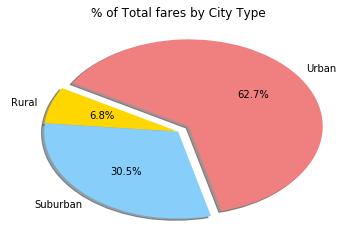

<Figure size 432x288 with 0 Axes>

In [3]:
# Calculate Type Percents
fare = combined_data.groupby(["type"])['fare'].sum()
total_fare = combined_data["fare"].sum()
fare_percent = fare/total_fare * 100
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
sizes = fare_percent
explode = (0,0,.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total fares by City Type")
plt.show()

# Save Figure
plt.savefig("Images/PieFare.png")

## Total Rides by City Type

In [4]:
# Calculate Ride Percents
total_ride = combined_data["type"].value_counts(normalize=True) * 100
# Build Pie Chart
labels = ["Urban","Suburban","Rural"]
colors = ["lightcoral","lightskyblue","gold"]
sizes = total_ride
explode = (0.1,0,0)
# Save Figure
plt.savefig("Images/PieRide.png")

<Figure size 432x288 with 0 Axes>

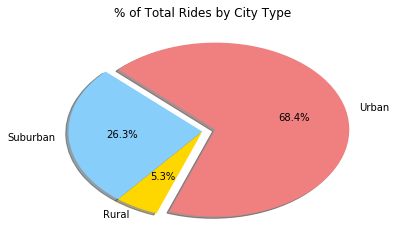

In [5]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

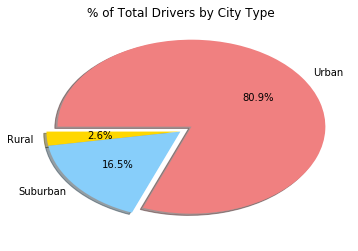

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate Driver Percents
drop_df = combined_data.drop_duplicates(["city"], keep = "first")
driver = drop_df.groupby(["type"])["driver_count"].sum()
total_driver = drop_df["driver_count"].sum()
driver_percent = driver/total_driver*100
# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
sizes = driver_percent
explode = (0,0,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Drivers by City Type")
plt.show()
# Save Figure
plt.savefig("Images/PieDriver.png")